## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [1, 0.95, 0.5, 0.2, 0.01, 0.001] 

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.6f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-momentum-%s" % str(mom)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with momentum = 1.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

50000/50000 [==============================] - 8s 158us/step - loss: 3.0134 - accuracy: 0.1000 - val_loss: 2.8458 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.7578 - accuracy: 0.1000 - val_loss: 2.4802 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.7803 - accuracy: 0.0997 - val_loss: 2.8313 - val_accuracy: 0.1000
Experiment with momentum = 0.950000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________________________________________________

Epoch 46/50
50000/50000 [==============================] - 8s 159us/step - loss: 0.9179 - accuracy: 0.6781 - val_loss: 1.4185 - val_accuracy: 0.5266
Epoch 47/50
50000/50000 [==============================] - 8s 160us/step - loss: 0.9069 - accuracy: 0.6806 - val_loss: 1.4714 - val_accuracy: 0.5054
Epoch 48/50
50000/50000 [==============================] - 8s 159us/step - loss: 0.8918 - accuracy: 0.6859 - val_loss: 1.4211 - val_accuracy: 0.5190
Epoch 49/50
50000/50000 [==============================] - 8s 160us/step - loss: 0.8783 - accuracy: 0.6922 - val_loss: 1.3873 - val_accuracy: 0.5249
Epoch 50/50
50000/50000 [==============================] - 8s 159us/step - loss: 0.8678 - accuracy: 0.6970 - val_loss: 1.4144 - val_accuracy: 0.5249
Experiment with momentum = 0.500000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____

50000/50000 [==============================] - 8s 158us/step - loss: 1.5835 - accuracy: 0.4464 - val_loss: 1.5967 - val_accuracy: 0.4416
Epoch 44/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5787 - accuracy: 0.4486 - val_loss: 1.6035 - val_accuracy: 0.4339
Epoch 45/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5745 - accuracy: 0.4507 - val_loss: 1.5930 - val_accuracy: 0.4457
Epoch 46/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5693 - accuracy: 0.4520 - val_loss: 1.5851 - val_accuracy: 0.4432
Epoch 47/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.5653 - accuracy: 0.4541 - val_loss: 1.5869 - val_accuracy: 0.4426
Epoch 48/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5609 - accuracy: 0.4543 - val_loss: 1.5782 - val_accuracy: 0.4452
Epoch 49/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5566 - accuracy: 0.4563 - val_loss:

Epoch 41/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.6782 - accuracy: 0.4139 - val_loss: 1.6830 - val_accuracy: 0.4102
Epoch 42/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.6743 - accuracy: 0.4150 - val_loss: 1.6832 - val_accuracy: 0.4082
Epoch 43/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.6702 - accuracy: 0.4172 - val_loss: 1.6809 - val_accuracy: 0.4048
Epoch 44/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.6661 - accuracy: 0.4193 - val_loss: 1.6739 - val_accuracy: 0.4129
Epoch 45/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.6625 - accuracy: 0.4196 - val_loss: 1.6674 - val_accuracy: 0.4133
Epoch 46/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.6587 - accuracy: 0.4209 - val_loss: 1.6648 - val_accuracy: 0.4128
Epoch 47/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.6548 - accuracy: 0.4230

50000/50000 [==============================] - 8s 159us/step - loss: 1.7242 - accuracy: 0.3965 - val_loss: 1.7274 - val_accuracy: 0.3940
Epoch 39/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7201 - accuracy: 0.3982 - val_loss: 1.7213 - val_accuracy: 0.3985
Epoch 40/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7162 - accuracy: 0.4000 - val_loss: 1.7172 - val_accuracy: 0.4022
Epoch 41/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7121 - accuracy: 0.4019 - val_loss: 1.7158 - val_accuracy: 0.4019
Epoch 42/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7080 - accuracy: 0.4021 - val_loss: 1.7106 - val_accuracy: 0.4041
Epoch 43/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.7045 - accuracy: 0.4051 - val_loss: 1.7059 - val_accuracy: 0.4060
Epoch 44/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7005 - accuracy: 0.4059 - val_loss:

Epoch 36/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7172 - accuracy: 0.4036 - val_loss: 1.7227 - val_accuracy: 0.3947
Epoch 37/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7132 - accuracy: 0.4047 - val_loss: 1.7146 - val_accuracy: 0.4013
Epoch 38/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7091 - accuracy: 0.4053 - val_loss: 1.7145 - val_accuracy: 0.3950
Epoch 39/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7054 - accuracy: 0.4079 - val_loss: 1.7066 - val_accuracy: 0.4034
Epoch 40/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7012 - accuracy: 0.4096 - val_loss: 1.7047 - val_accuracy: 0.4024
Epoch 41/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.6978 - accuracy: 0.4109 - val_loss: 1.6978 - val_accuracy: 0.4076
Epoch 42/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.6940 - accuracy: 0.4121

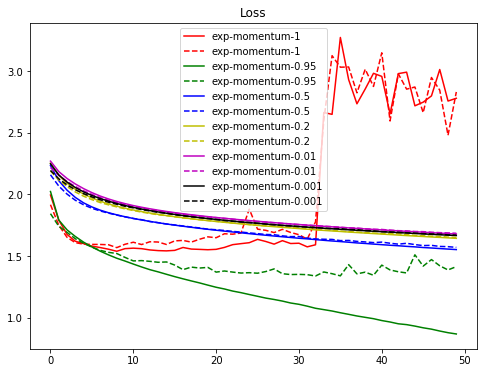

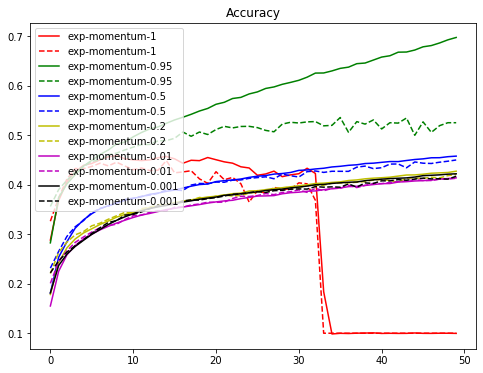

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [14]:
results2 = {}
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.6f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-momentum-%s" % str(mom)
    results2[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with momentum = 1.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

50000/50000 [==============================] - 7s 143us/step - loss: 2.3562 - accuracy: 0.1014 - val_loss: 2.3590 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.3350 - accuracy: 0.0997 - val_loss: 2.3586 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.3610 - accuracy: 0.1010 - val_loss: 2.3297 - val_accuracy: 0.1000
Experiment with momentum = 0.950000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________________________________________________

Epoch 46/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.0161 - accuracy: 0.6422 - val_loss: 1.3185 - val_accuracy: 0.5383
Epoch 47/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.9843 - accuracy: 0.6543 - val_loss: 1.3251 - val_accuracy: 0.5384
Epoch 48/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.9848 - accuracy: 0.6521 - val_loss: 1.3233 - val_accuracy: 0.5375
Epoch 49/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.9714 - accuracy: 0.6584 - val_loss: 1.3184 - val_accuracy: 0.5430
Epoch 50/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.9710 - accuracy: 0.6575 - val_loss: 1.3221 - val_accuracy: 0.5347
Experiment with momentum = 0.500000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____

50000/50000 [==============================] - 7s 143us/step - loss: 1.5914 - accuracy: 0.4430 - val_loss: 1.6064 - val_accuracy: 0.4348
Epoch 44/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.5875 - accuracy: 0.4467 - val_loss: 1.5978 - val_accuracy: 0.4375
Epoch 45/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5825 - accuracy: 0.4461 - val_loss: 1.5925 - val_accuracy: 0.4387
Epoch 46/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5780 - accuracy: 0.4478 - val_loss: 1.5877 - val_accuracy: 0.4415
Epoch 47/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5739 - accuracy: 0.4490 - val_loss: 1.5889 - val_accuracy: 0.4404
Epoch 48/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.5695 - accuracy: 0.4522 - val_loss: 1.5830 - val_accuracy: 0.4394
Epoch 49/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.5649 - accuracy: 0.4525 - val_loss:

Epoch 41/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.6766 - accuracy: 0.4185 - val_loss: 1.6826 - val_accuracy: 0.4109
Epoch 42/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.6723 - accuracy: 0.4183 - val_loss: 1.6765 - val_accuracy: 0.4128
Epoch 43/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.6681 - accuracy: 0.4218 - val_loss: 1.6710 - val_accuracy: 0.4144
Epoch 44/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.6642 - accuracy: 0.4214 - val_loss: 1.6687 - val_accuracy: 0.4135
Epoch 45/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6599 - accuracy: 0.4250 - val_loss: 1.6664 - val_accuracy: 0.4175
Epoch 46/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.6562 - accuracy: 0.4250 - val_loss: 1.6612 - val_accuracy: 0.4210
Epoch 47/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.6520 - accuracy: 0.4268

50000/50000 [==============================] - 7s 143us/step - loss: 1.7243 - accuracy: 0.3979 - val_loss: 1.7275 - val_accuracy: 0.4000
Epoch 39/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.7203 - accuracy: 0.3993 - val_loss: 1.7246 - val_accuracy: 0.3952
Epoch 40/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.7162 - accuracy: 0.4012 - val_loss: 1.7217 - val_accuracy: 0.3975
Epoch 41/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.7122 - accuracy: 0.4024 - val_loss: 1.7165 - val_accuracy: 0.4009
Epoch 42/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.7085 - accuracy: 0.4043 - val_loss: 1.7132 - val_accuracy: 0.4033
Epoch 43/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.7046 - accuracy: 0.4051 - val_loss: 1.7109 - val_accuracy: 0.3989
Epoch 44/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.7008 - accuracy: 0.4062 - val_loss:

Epoch 36/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.7415 - accuracy: 0.3953 - val_loss: 1.7428 - val_accuracy: 0.3905
Epoch 37/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.7372 - accuracy: 0.3955 - val_loss: 1.7398 - val_accuracy: 0.3926
Epoch 38/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.7331 - accuracy: 0.3972 - val_loss: 1.7343 - val_accuracy: 0.3948
Epoch 39/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.7289 - accuracy: 0.3996 - val_loss: 1.7313 - val_accuracy: 0.3935
Epoch 40/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.7248 - accuracy: 0.3999 - val_loss: 1.7279 - val_accuracy: 0.3940
Epoch 41/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.7206 - accuracy: 0.4012 - val_loss: 1.7226 - val_accuracy: 0.3983
Epoch 42/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.7167 - accuracy: 0.4039

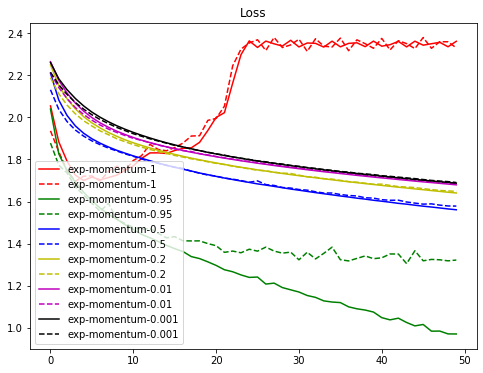

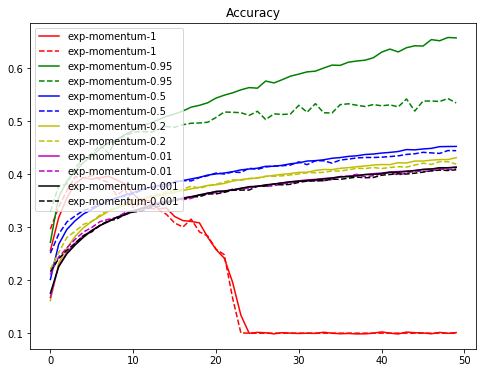

In [15]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()